In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics # metrics SSE MSE RMSE
#with using 7 steps of datascience
#1-Problem Statement
#2-Gathering Data(Fetching data,reading data)
#3-Transforming Data(datacleaning,EDA,featuring data)
#4-Modeling
#5-ModelEvaluation
#6-submission

In [ ]:
df=pd.read_csv("/content/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


data visualization

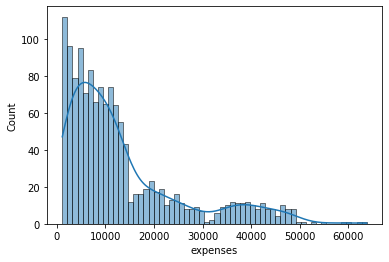

In [ ]:
sns.histplot(df["expenses"],kde=True,bins=60)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


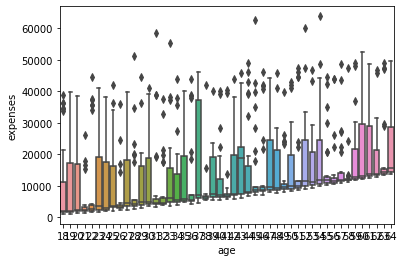

In [ ]:
sns.boxplot(df["age"],df["expenses"])

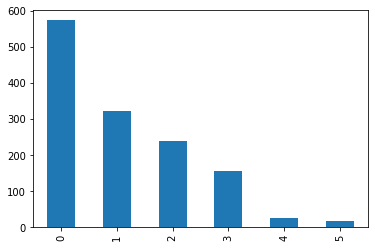

In [ ]:
df["children"].value_counts().plot(kind="bar")

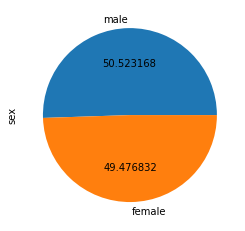

In [ ]:
df["sex"].value_counts().plot(kind="pie",autopct="%2f")

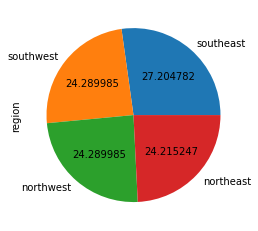

In [ ]:
df["region"].value_counts().plot(kind="pie",autopct="%2f")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


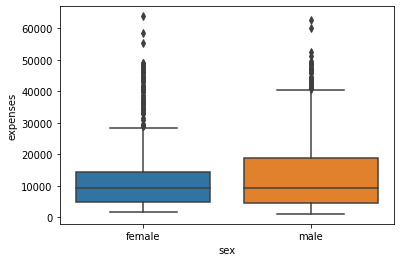

In [ ]:
sns.boxplot(df["sex"],df["expenses"])

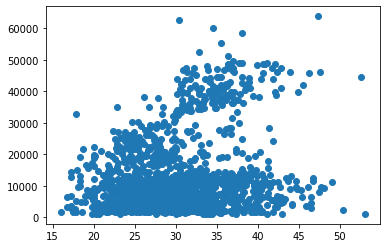

In [ ]:
plt.scatter(df["bmi"],df["expenses"])

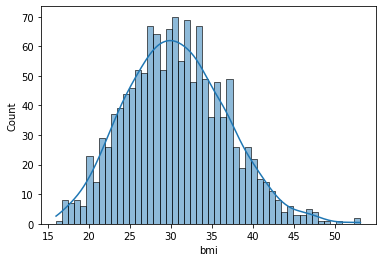

In [ ]:
sns.histplot(df["bmi"],kde=True,bins=50)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


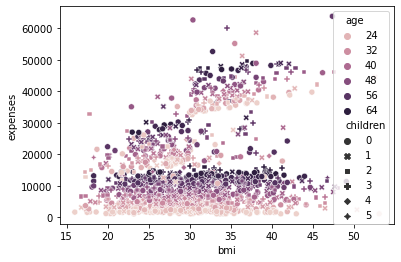

In [ ]:
sns.scatterplot(df["bmi"],df["expenses"],hue=df["age"],style=df["children"])

In [ ]:
df.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [ ]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df.groupby("children")["expenses"].mean()

children
0    12365.975767
1    12731.171821
2    15073.564000
3    15355.318535
4    13850.656800
5     8786.035556
Name: expenses, dtype: float64

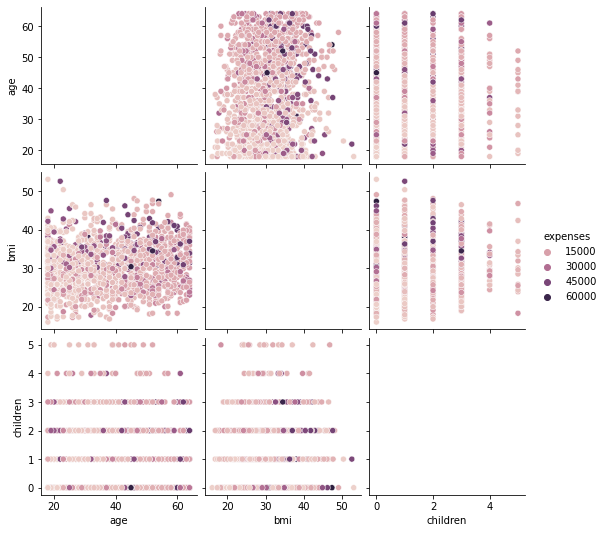

In [ ]:
sns.pairplot(df,hue="expenses")

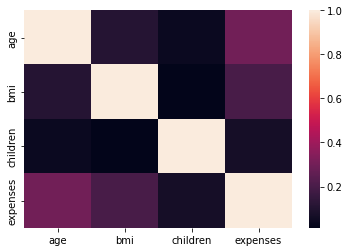

In [ ]:
sns.heatmap(df.corr())

#Data cleaning/preprocessing

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df["smoker"].replace({"yes":"1","no":"0"},inplace=True)

In [ ]:
df["region"]=df["region"].astype("category")
df["region"]=df["region"].cat.codes

In [ ]:
df["sex"]=df["sex"].astype("category")
df["sex"]=df["sex"].cat.codes

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [ ]:
df["expenses"].value_counts().mean()

1.0007479431563202

In [ ]:
df.shape

(1338, 7)

In [ ]:
X=df.drop(["expenses"],axis=1)
y=df["expenses"]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_
lr.coef_

array([  261.61211627,   109.84388798,   344.59527154,   424.66030781,
       23620.31438371,  -326.09713836])

In [ ]:
y_pred_train=lr.predict(X_train)

In [ ]:
y_pred_train

array([ 1.40166046e+04,  8.30952948e+03,  1.33744202e+04,  3.63308897e+04,
        3.37796625e+04,  3.54810724e+04,  5.97706395e+03,  6.16875570e+03,
        1.67029303e+04,  8.39365450e+03,  3.77707328e+04,  4.81559508e+03,
        8.30395940e+03,  9.98142519e+03,  3.01757067e+04,  5.47069559e+03,
        3.46786931e+03,  1.67486713e+04,  3.74733936e+03,  6.22474595e+03,
        1.03826778e+04, -1.13170504e+03,  2.95494838e+04,  8.49714830e+03,
        9.96663557e+03,  5.71203863e+03,  7.47440363e+03,  1.15981056e+04,
        2.87812490e+04,  9.60998871e+03,  1.05914571e+04,  6.45987871e+03,
        4.34909320e+03,  7.21242672e+02,  7.92579145e+03,  1.13534945e+04,
        1.00232376e+04,  8.42898391e+03,  6.33356645e+03,  4.34152430e+03,
        7.53165248e+03,  3.36012633e+04,  3.36345687e+04,  2.96251339e+03,
        3.98309353e+04,  2.84079152e+04,  1.07031787e+04,  3.93384545e+03,
        1.70599423e+04,  3.48587160e+03,  9.01138267e+03,  2.95756002e+04,
        1.64590447e+04,  

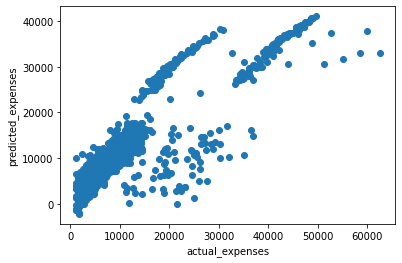

In [ ]:
plt.scatter(y_train,y_pred_train)
plt.xlabel("actual_expenses")
plt.ylabel("predicted_expenses")
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score=(y_train,y_pred_train)

In [ ]:
y_pred_test=lr.predict(X_test)

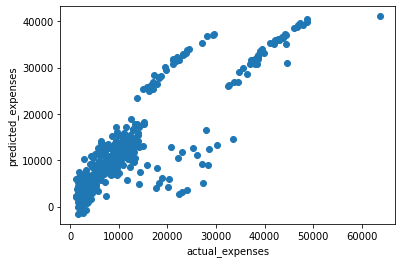

In [ ]:
plt.scatter(y_test,y_pred_test)
plt.xlabel("actual_expenses")
plt.ylabel("predicted_expenses")
plt.show()

In [ ]:
lr.score(X_train,y_train)

0.7422691015689171

In [ ]:
lr.score(X_test,y_test)

0.7694626233326285